In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

In [72]:
data = pd.read_excel("Boston Housing Dataset 1978.xlsx")
data.dropna(inplace=True)
data.drop_duplicates(inplace=True)

In [73]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [74]:
data.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1,273.0,21.0,396.90,7.88,11.9


In [75]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000
mean,1.420825,12.721239,10.304889,0.077434,0.540816,6.343538,65.557965,4.043570,7.823009,377.442478,18.247124,369.826504,11.441881,23.750442
std,2.495894,24.326032,6.797103,0.267574,0.113816,0.666808,28.127025,2.090492,7.543494,151.327573,2.200064,68.554439,6.156437,8.808602
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,6.300000
25%,0.069875,0.000000,4.930000,0.000000,0.447000,5.926750,40.950000,2.354750,4.000000,276.750000,16.800000,377.717500,6.587500,18.500000
50%,0.191030,0.000000,8.140000,0.000000,0.519000,6.229000,71.800000,3.550400,5.000000,307.000000,18.600000,392.080000,10.250000,21.950000
75%,1.211460,20.000000,18.100000,0.000000,0.605000,6.635000,91.625000,5.401100,7.000000,411.000000,20.200000,396.157500,15.105000,26.600000
max,9.966540,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,34.410000,50.000000


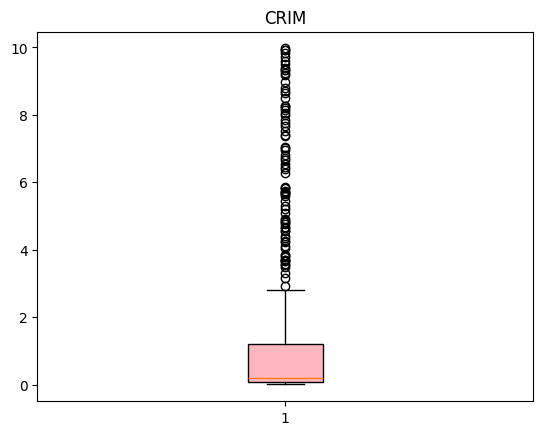

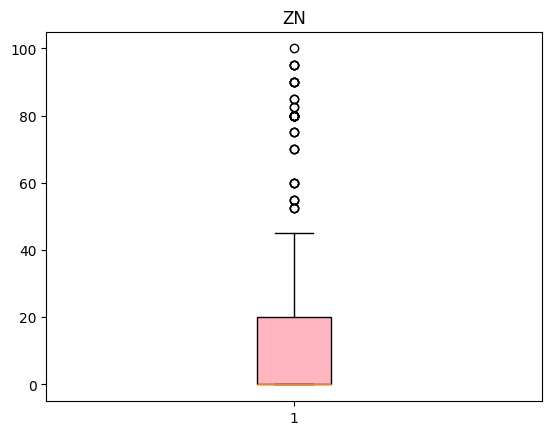

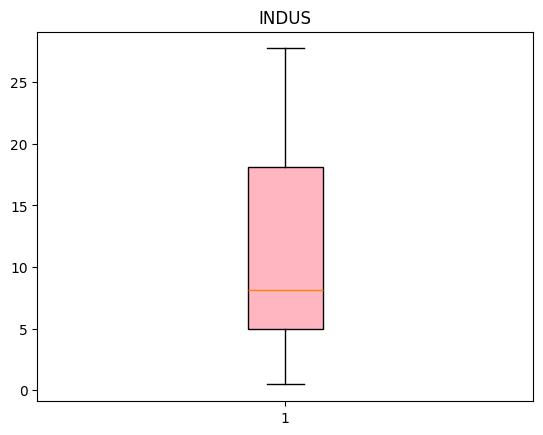

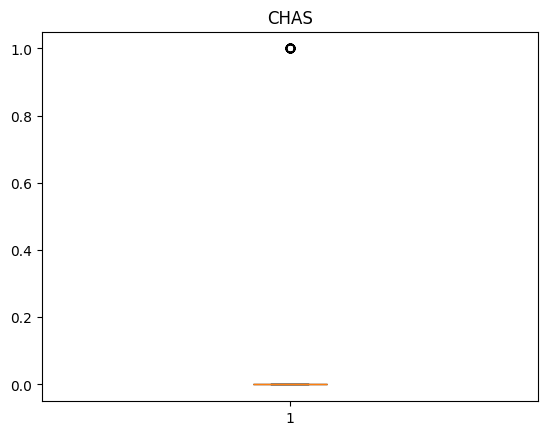

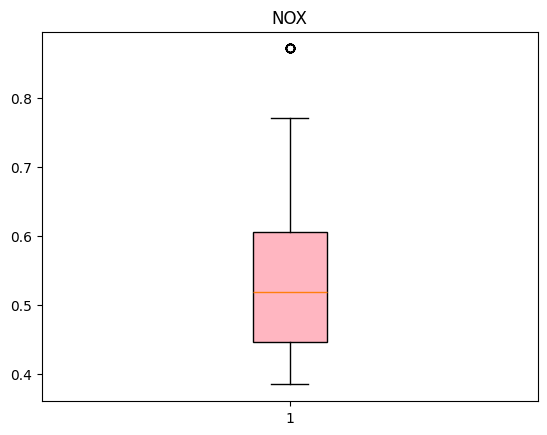

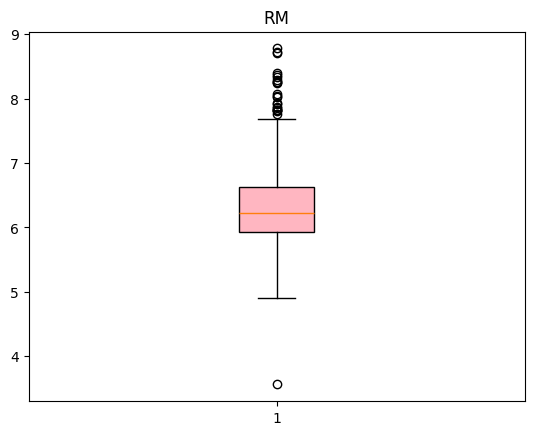

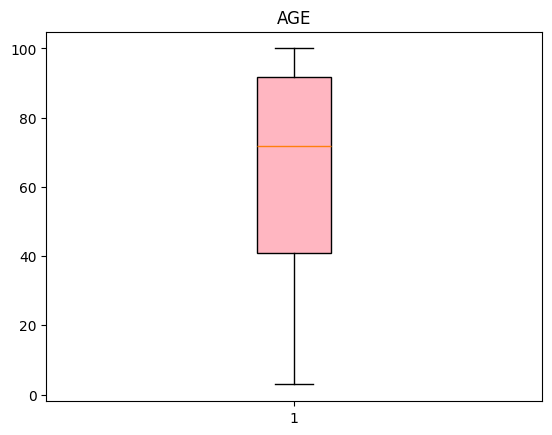

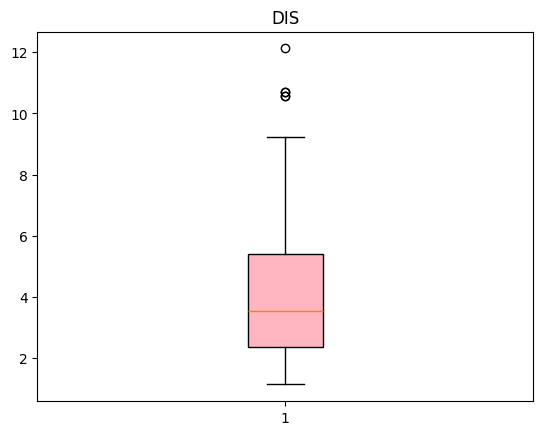

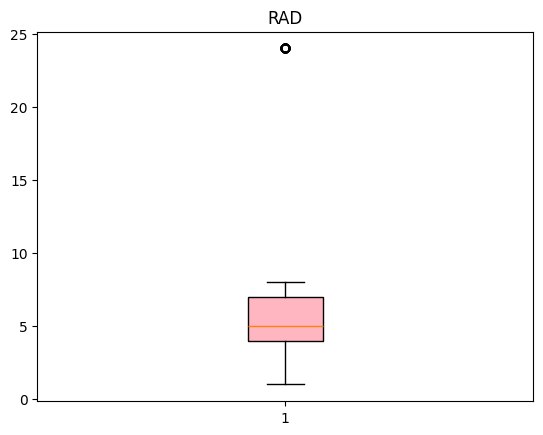

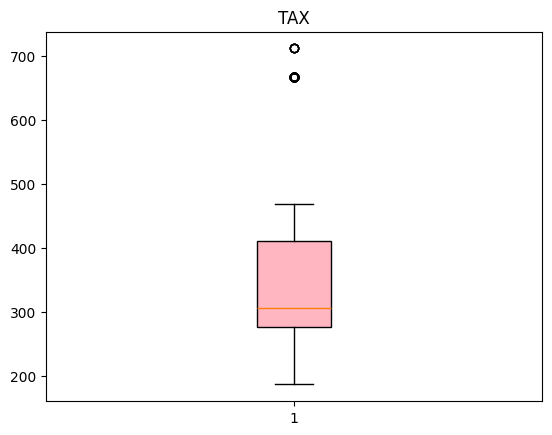

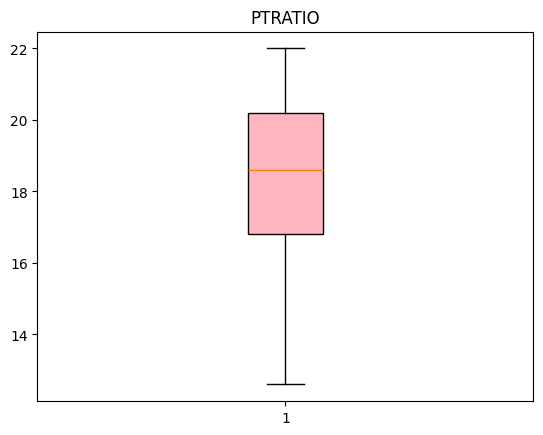

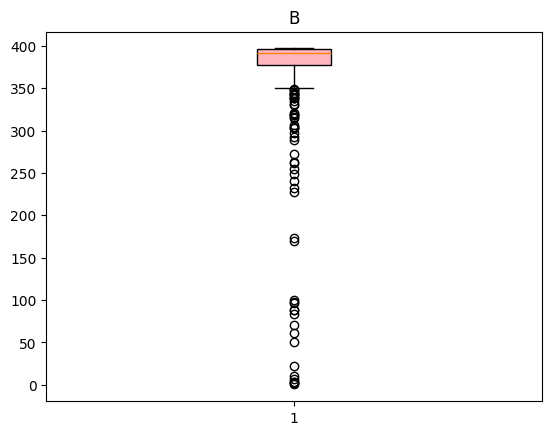

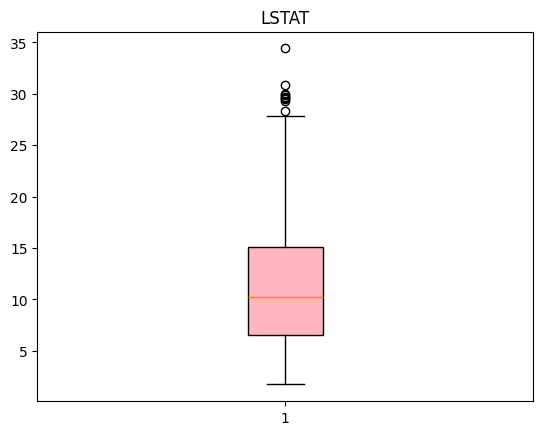

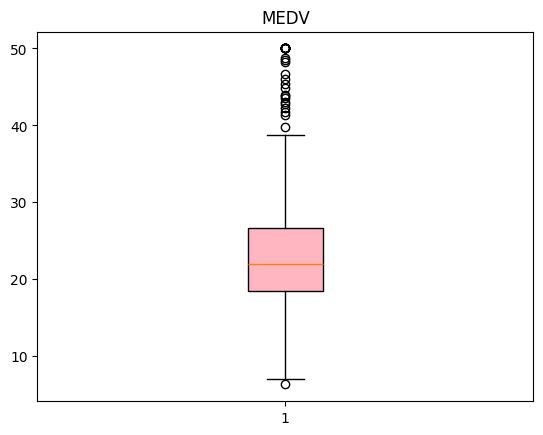

In [76]:
for i in data.columns:
    plt.figure()
    plt.boxplot(data[i], patch_artist=True, boxprops=dict(facecolor='lightpink'))
    plt.title(i)
    plt.show()

In [77]:
x = data.drop(columns=["MEDV"])
y = data["MEDV"]

In [78]:
x_escalada = x.copy()

In [79]:
for i in x_escalada.columns:
    x_min = x_escalada[i].min()
    x_escalada[i] = x_escalada[i] - x_min
    x_max = x_escalada[i].max()
    x_escalada[i] = x_escalada[i] / x_max

In [80]:
x_escalada.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.099449
1,0.002107,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.226744
2,0.002105,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.070379
3,0.002615,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.037026
4,0.006298,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.110159


In [81]:
ols = sm.OLS(y, sm.add_constant(x))
results = ols.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     96.16
Date:                Mon, 01 Sep 2025   Prob (F-statistic):          2.64e-119
Time:                        17:46:15   Log-Likelihood:                -1319.4
No. Observations:                 452   AIC:                             2667.
Df Residuals:                     438   BIC:                             2724.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.8664      5.477      3.810      0.000      10.102      31.631
CRIM          -0.2380      0.224     -1.063      0.288      -0.678       0.202
ZN             0.0382      0.013      2.858      0.004       0.012       0.065
INDUS          0.0514      0.060      0.861      0.390      -0.066       0.169
CHAS           2.4350      0.830      2.935      0.004       0.804       4.066
NOX          -11.6580      3.928     -2.968      0.003     -19.378      -3.938
RM             5.1102      0.455     11.235      0.000       4.216       6.004
AGE           -0.0061      0.013     -0.465      0.642      -0.032       0.020
DIS           -1.2715      0.196     -6.495      0.000      -1.656      -0.887
RAD            0.2944      0.085      3.448      0.001       0.127       0.462
TAX           -0.0114      0.004     -3.145      0.002      -0.018      -0.004
PTRATIO       -0.8310      0.127     -6.544      0.000      -1.081      -0.581
B              0.0123      0.004      3.505      0.001       0.005       0.019
LSTAT         -0.5208      0.057     -9.068      0.000      -0.634      -0.408
==============================================================================
Omnibus:                      203.769   Durbin-Watson:                   1.181
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1595.387
Skew:                           1.762   Prob(JB):                         0.00
Kurtosis:                      11.502   Cond. No.                     1.55e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.55e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [82]:
ols_escalada = sm.OLS(y, sm.add_constant(x_escalada))
results_escalada = ols_escalada.fit()
results_escalada.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     96.16
Date:                Mon, 01 Sep 2025   Prob (F-statistic):          2.64e-119
Time:                        17:46:15   Log-Likelihood:                -1319.4
No. Observations:                 452   AIC:                             2667.
Df Residuals:                     438   BIC:                             2724.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.9457      2.615      7.626      0.000      14.805      25.086
CRIM          -2.3708      2.230     -1.063      0.288      -6.753       2.011
ZN             3.8221      1.337      2.858      0.004       1.194       6.450
INDUS          1.4010      1.627      0.861      0.390      -1.797       4.599
CHAS           2.4350      0.830      2.935      0.004       0.804       4.066
NOX           -5.6658      1.909     -2.968      0.003      -9.418      -1.914
RM            26.6699      2.374     11.235      0.000      22.004      31.335
AGE           -0.5917      1.272     -0.465      0.642      -3.092       1.908
DIS          -13.9827      2.153     -6.495      0.000     -18.214      -9.752
RAD            6.7722      1.964      3.448      0.001       2.912      10.632
TAX           -5.9525      1.893     -3.145      0.002      -9.673      -2.232
PTRATIO       -7.8117      1.194     -6.544      0.000     -10.158      -5.465
B              4.8836      1.393      3.505      0.001       2.145       7.622
LSTAT        -17.0182      1.877     -9.068      0.000     -20.707     -13.330
==============================================================================
Omnibus:                      203.769   Durbin-Watson:                   1.181
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1595.387
Skew:                           1.762   Prob(JB):                         0.00
Kurtosis:                      11.502   Cond. No.                         32.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""